In [1]:
# Jupyter Notebook with widget matplotlib plots
#%matplotlib notebook
# Jupyter Lab with widget matplotlib plots
#%matplotlib widget 
# with Jupyter and Jupyter Lab but without widget matplotlib plots
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from netCDF4 import Dataset
import sys
import pyicon as pyic
import pyicon.quickplots as pyicqp
import cartopy.crs as ccrs

In [3]:
ccrs_proj = ccrs.PlateCarree()

In [4]:
run = 'nib0004'
runname = 'icon_08'
gname = 'r2b6'
lev = 'L64'

path_data     = f'/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/{runname}/icon-oes/experiments/{run}/'
string = 'asdf{}'.format(run)
string2 = 'asdf'+run+'asdf'
string3 = 'asdf%sasdf' % (run)
path_grid     = f'/mnt/lustre01/work/mh0033/m300602/icon/grids/{gname}/'
path_ckdtree  = f'{path_grid}ckdtree/'
fpath_fx      = f'{path_grid}{gname}_{lev}_fx.nc'
fpath_ckdtree = f'{path_grid}ckdtree/rectgrids/{gname}_res0.30_180W-180E_90S-90N.npz'

In [5]:
IcD = pyic.IconData(
               fname        = run+'_????????????????.nc',
               path_data    = path_data,
               path_grid    = path_grid,
               gname        = gname,
               lev          = lev,
               #path_ckdtree = path_ckdtree,
               #section_name = '',
               #fpath_fx     = fpath_fx,
               rgrid_name   = 'global_0.3',
               do_triangulation = True,
               omit_last_file   = False
              )

In [6]:
# --- specify time step
it = np.argmin(np.abs(IcD.times-np.datetime64('2295-01-01T00:00:00')))
# --- specify depth level
iz = np.argmin(np.abs(IcD.depthc-100.))

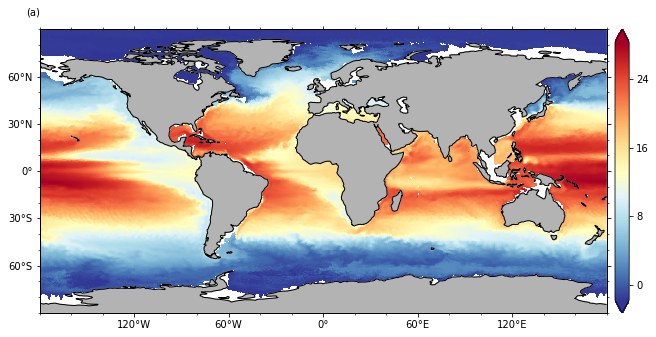

In [7]:
f = Dataset(IcD.flist_ts[it], 'r')
to = f.variables['to'][IcD.its[it],iz,:]
f.close()
lon, lat, toi = pyic.interp_to_rectgrid(to, fpath_ckdtree, coordinates='clat clon')

hca, hcb = pyic.arrange_axes(1,1, plot_cb=True, asp=0.5, fig_size_fac=2.5, projection=ccrs_proj)
ii=-1

ii+=1; ax=hca[ii]; cax=hcb[ii]
pyic.shade(lon, lat, toi, ax=ax, cax=cax, clim='auto')
pyic.plot_settings(ax, template='global', projection=ccrs_proj)

(<cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2b0e32fbb630>,
 {})

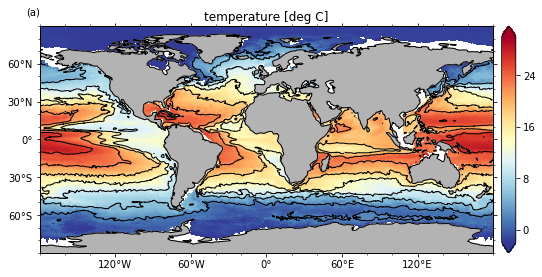

In [8]:
IaV = pyic.IconVariable('to', 'deg C', 'temperature')
IaV.data = to
IaV.interp_to_rectgrid(fpath_ckdtree)
pyic.hplot_base(IcD, IaV, clim=[-2,30], cmap='auto',
                projection='PlateCarree', xlim=[-180.,180.], ylim=[-90.,90.],
                use_tgrid=False,
                conts=np.arange(-2,30,4),
               )

pyicon.time_average: var=to: it_ave=[302]


{'fpath': '/mnt/lustre01/work/mh0033/m300602/proj_vmix/icon/icon_08/icon-oes/experiments/nib0004/nib0004_22910101T000000Z.nc',
 'long_name': 'sea water potential temperature'}

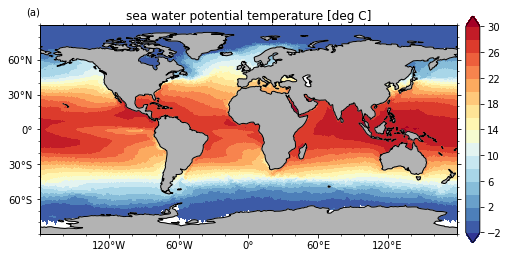

In [15]:
pyicqp.qp_hplot(fpath=IcD.flist_ts[it], var='to', depth=0,
                t1=IcD.times[it], t2=IcD.times[it],
                clim=[-2.,30.], cincr=2.0, cmap='auto',
                rgrid_name='global_0.3',
                path_ckdtree=path_ckdtree,
                projection='PlateCarree',
                IcD=IcD)

In [10]:
IaV.data.shape

(600, 1200)

In [11]:
IaV.lon.shape

(1200,)

In [12]:
IaV.lat.shape

(600,)

In [13]:
IcD.lon.shape

(1200,)